In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import numpy as np                                  
import pandas as pd 
import tensorflow as tf 
import keras
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", None)

In [120]:
df = pd.read_excel("/content/drive/My Drive/input_data.xlsx")

In [121]:
df.sample(5)

,Short description,Description,Caller,Assignment group
4148,slight change to desktop,"\r\n\r\nreceived from: crkdjbot.qiztrxne@gmail.com\r\n\r\nhello,\r\n\r\nis there a way to remove this information from my desktop screen?\r\n\r\n",crkdjbot qiztrxne,GRP_0
4790,"the dynamics crm url checks is reporting a : down status on, company-crm-sp-mfg_tooltion.azurewebsites.net.","observing below alert in monitoring_tool since 06:33 am et on 09/10.\r\n\r\napplication ""dynamics crm url checks"" on node ""company-crm-sp-mfg_tooltion.azurewebsites.net"" is down",oldrctiu bxurpsyi,GRP_40
3622,"cannot print to prtqx1248 on pc rqxw8514035 anymore, prints stall in print queue.","cannot print to prtqx1248 on pc rqxw8514035 anymore, prints stall in print queue.",mfrsgwnk wremyjlo,GRP_3
3032,unable to load outlook,unable to load outlook,tkflbvim smwqzfgc,GRP_0
1964,job Job_452 failed in job_scheduler at: 10/08/2016 21:39:00,received from: monitoring_tool@company.com\r\n\r\n10/8/2016 9:38:53 pm :: unable to allocate processing resources. error: all backup proxies are offline or outdated \r\n\r\n\r\njob Job_452 failed in job_scheduler at: 10/08/2016 21:39:00,bpctwhsn kzqsbmtp,GRP_8


In [122]:
df.duplicated().sum()

83

In [123]:
df[df.duplicated()]

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in job_scheduler at: 10/22/2016 18:33:00,received from: monitoring_tool@company.com\r\n\r\njob bkbackup_tool_powder_prod_full failed in job_scheduler at: 10/22/2016 18:33:00,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,"we have agreed price with many of the distributors for a given period and skus. this is specified through pricing condition zcnc in erp. in distributor_tool, it is order through sold to & ship to combination.\r\n- till august â€“ flat rate deployment, we did not have any issues.\r\n- today, when the distributor tried to book the order with zcnc pricing condition. the initial screen shows the correct price. but when the item is selected and quick order is clicked on, the price is getting changed to list price less standard discount instead of retaining the zcnc price.",hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjesh using password_management_tool password reset.,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [124]:
df.drop_duplicates(keep=False,inplace=True)

In [125]:
df.duplicated().sum()

0

In [126]:
df.sample(5)

,Short description,Description,Caller,Assignment group
470,access to s drive.,"\r\n\r\nreceived from: wnvlmsjr.znbvlygd@gmail.com\r\n\r\nhello ,\r\n\r\nkindly request to give access to s drive.\r\n\r\ns:\globalengservices\\r\n\r\n\r\n",wnvlmsjr znbvlygd,GRP_12
8210,rds server germany not reachable for thinclients (HostName_584),after reboot of the serverteam my thinclients are not able to connect to the rds server (HostName_584),smpijawb eawkpgqf,GRP_12
6495,exel file is not openning as the default programdntym to open with is changed.,exel file is not openning as the default programdntym to open with is changed.,gmneclxj czqthmrs,GRP_0
7797,no audio device installed,no audio device installed,vbihmtzo mphkitvr,GRP_62
6788,misplaced password,password misplaced,djwkpmhl kbgjnywa,GRP_0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8360 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8352 non-null   object
 1   Description        8359 non-null   object
 2   Caller             8360 non-null   object
 3   Assignment group   8360 non-null   object
dtypes: object(4)
memory usage: 326.6+ KB


In [128]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [129]:
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [130]:
df.Description.replace(np.NaN, 'i am locked out of skype', inplace=True)

In [131]:
df[df['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail.com\r\n\r\ngood morning,\r\n\r\nwhen trying to log on to erp i get this error below.\r\nplease help urgently as i can not process customer order.\r\n\r\n[cid:image001.png@01d20f2e.751db880]\r\n\r\n\r\n",eqmuniov ehxkcbgj,GRP_0


In [132]:
dfcallers = df['Caller'].unique() 
dfcallers.shape

(2944,)

In [133]:
dfbck=df.copy(deep=True)
df.drop(["Caller","Short description"],axis=1,inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8360 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8360 non-null   object
 1   Assignment group  8360 non-null   object
dtypes: object(2)
memory usage: 195.9+ KB


In [134]:
df.isnull().sum()

Description         0
Assignment group    0
dtype: int64

In [135]:
df["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [136]:
# Target class is imbalanced
cls=df.groupby(['Assignment group']).size().reset_index(name='counts')
cls

,Assignment group,counts
0,GRP_0,3908
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,632


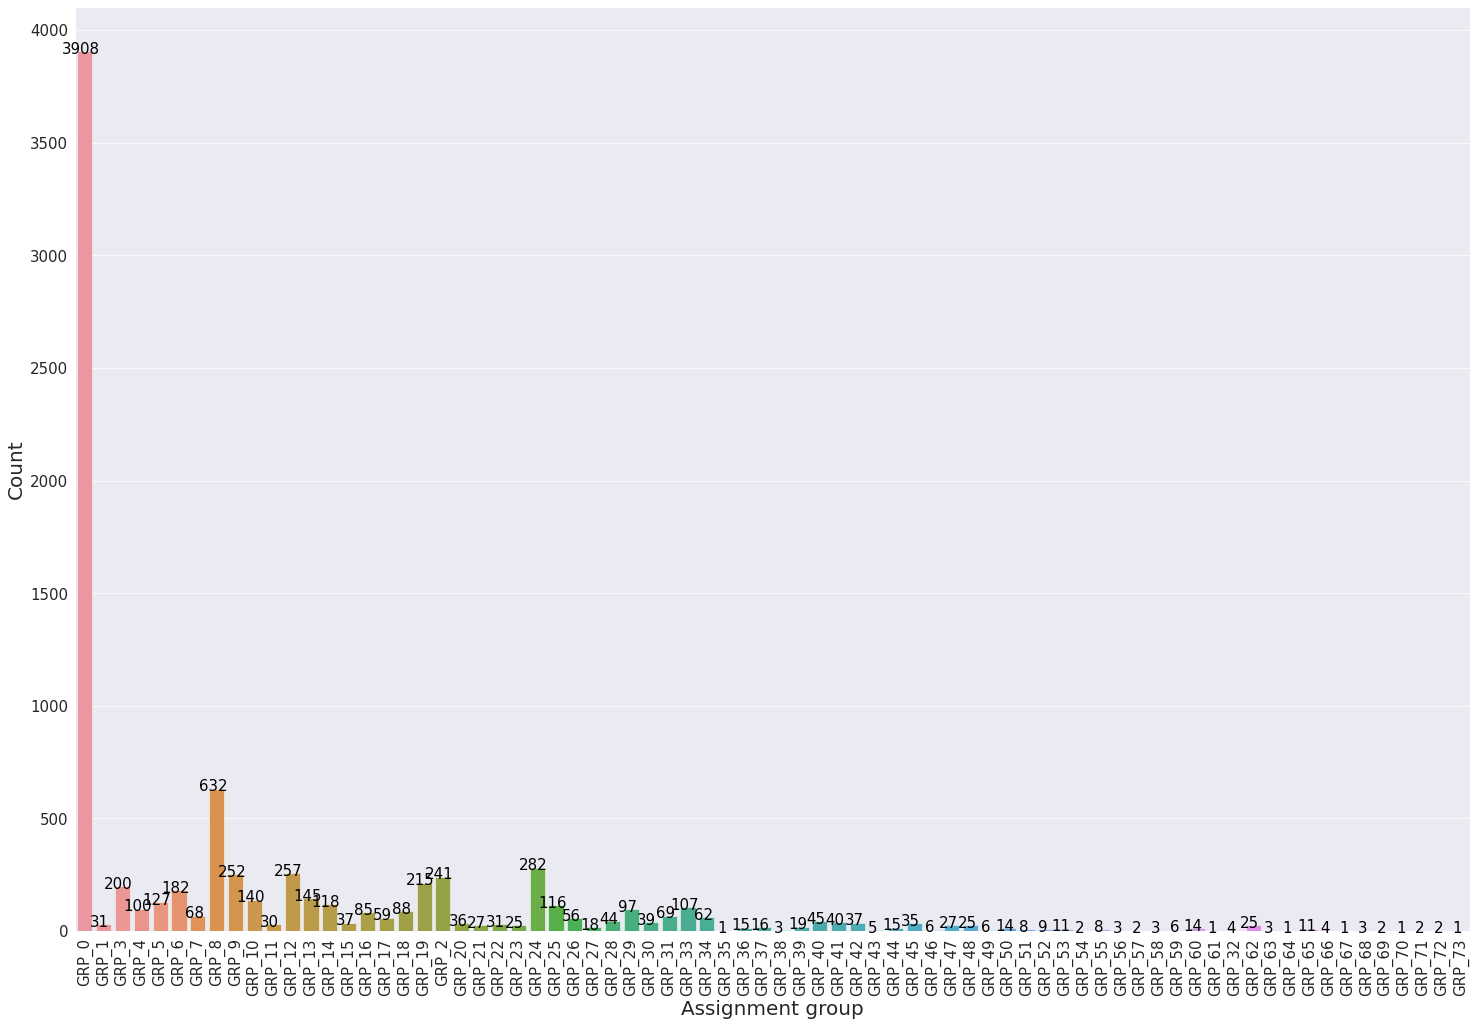

In [137]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(25,17))
g=sns.countplot(x='Assignment group', data=df);
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel("Assignment group",fontsize=20)
g.set_ylabel("Count",fontsize=20)
g.tick_params(labelsize=15)
for p in g.patches:
    g.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+120), ha='center', va='top', color='black', size=15)
plt.show()

In [138]:
targetCnt=df['Assignment group'].value_counts()
targetCnt.describe()

count      74.000000
mean      112.972973
std       457.580204
min         1.000000
25%         5.250000
50%        26.000000
75%        81.000000
max      3908.000000
Name: Assignment group, dtype: float64

In [139]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [140]:
from bs4 import BeautifulSoup
import re
import unicodedata
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))

In [141]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    return text

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  


In [142]:
def clean_text(text):
    text=text.lower()
    text= re.sub(r"_x000D_",' ',text)
    text = re.sub(r'[\r|\n|\r\n]+', ' ',text)
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    text = re.sub(r"issue resolved.",' ', text)
    # Removing url
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #Removing email 
    text = re.sub(r'\S+@\S+', '', text)
    text = text.replace("\\", ' ')
    # Removing numbers 
    text = re.sub(r'\d+','' ,text)
    # Removing accented characters
    text = remove_accented_chars(text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text= strip_html_tags(text)
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Removing special characters and\or digits    
    special_char_pattern = re.compile(r'([{.(-)!_,}])')
    text = special_char_pattern.sub(" \\1 ", text)
    text = remove_special_characters(text, remove_digits=True) 
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in dfcallers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()

    return text

In [143]:
df['Clndescription'] = df['Description'].apply(clean_text)

In [144]:
df.sample(10) 

,Description,Assignment group,Clndescription
6789,"sehr geehrte damen und herren,\r\n\r\nkÃ¶nnen sie mich bitte zu den edi bestellungen der ksb ag kurz anrufen?\r\n\r\n\r\nfreundliche grÃ¼ÃŸe / kind",GRP_32,sehr geehrte damen und herren kannen sie mich bitte zu den edi bestellungen der ksb ag kurz anrufen freundliche graaye kind
1530,the new iphone 6s is not getting quaraintined.,GRP_28,the new iphone is not getting quaraintined
3348,received from: monitoring_tool@company.com\r\n\r\njob SID_56hoti failed in job_scheduler at: 09/24/2016 18:06:00,GRP_8,job sid hoti failed in job scheduler at
174,unable to take print out from wy4678,GRP_19,unable to take print out from wy
1576,"\r\n\r\nreceived from: vtwxaefm.ljisafue@gmail.com\r\n\r\nit helpdesk,\r\n\r\nplease provide network connection for alicona edgemaster hone measuring equipment installed in pu5.\r\n\r\nthis is necessary for software updating and also for shatryung relevant information with global team.\r\n\r\n\r\n\r\n",GRP_19,it helpdesk please provide network connection for alicona edgemaster hone measuring equipment installed in pu this is necessary for software updating and also for shatryung relevant information with global team
4090,ä»Šå¹´å‘ç”Ÿäº†5æ¬¡ç½‘ç»œåœ°å€ä¸¢å¤±ï¼Œéœ€è¦é‡å¯è®¾å¤‡åŽï¼Œæ‰èƒ½é‡æ–°æ¢å¤ï¼Œåœ¨å…¶ä»–è®¾å¤‡ä¸Šæ— æ­¤æ•…éšœã€‚æ˜¯å¦ç»‘å®šipåœ°å€ï¼Ÿ,GRP_30,asa acyaoccaaa aieeea eaazieeaia aeaa esa acasipaaiy
2542,please provide pos data for the month of september '16.\r\n\r\n,GRP_9,please provide pos data for the month of september
987,unable to launch ethics. flash player issue.,GRP_0,unable to launch ethics flash player issue
7650,olifgtmpio gargtcia blagtnco does not working for company anymore since october 2013. i do not know why there is still active ad account for him.\nplease delete that account as soon as possible as well any other system accounts for blancog (olifgtmpio gargtcia blagtnco).\n,GRP_2,olifgtmpio gargtcia blagtnco does not working for company anymore since october do not know why there is still active ad account for him please delete that account as soon as possible as well any other system accounts for blancog olifgtmpio gargtcia blagtnco
7957,name:zcqnuawo zxdtskpw\nlanguage:\nbrowser:microsoft internet explorer\nemail:zcqnuawo.zxdtskpw@gmail.com\ncustomer number:\ntelephone:\nsummary:bex password was locked due to wrong typing. please reset the password\n,GRP_0,name language browsermicrosoft internet explorer customer number telephone summarybex password was locked due to wrong typing please reset the password


In [145]:
df=df.loc[(df.Clndescription.str.len() != 0)] 

In [146]:
!pip install langdetect

In [147]:
!pip install deep-translator

In [148]:
from langdetect import detect
# from google_trans_new import google_translator  
from deep_translator import GoogleTranslator

def detectln(text):
  try:
    result_lang = detect(text)
  except:
    result_lang ='Other'
  return result_lang

#simple function to detect and translate text 
def detect_translate(text,target_lang):
    
    result_lang = detect(text)
    
    if result_lang == target_lang:
        return text 
    
    else:
        #translator = google_translator()
        #translate_text = translator.translate(text,lang_src=result_lang,lang_tgt=target_lang)
        translated = GoogleTranslator(source='auto', target=target_lang).translate(text)
        return translated 

In [149]:
df["Language"] = df['Clndescription'].apply(lambda x: detectln(x)) 

In [150]:
df["Language"].unique()

array(['en', 'no', 'es', 'it', 'af', 'sv', 'sl', 'fr', 'nl', 'ca', 'tl',
       'id', 'fi', 'de', 'cy', 'hu', 'pl', 'et', 'da', 'so', 'ro', 'pt',
       'sw', 'sq', 'sk', 'tr', 'lt', 'cs', 'lv', 'hr'], dtype=object)

In [151]:
df[df["Language"] != 'en'].groupby(['Language']).size().reset_index(name='counts')

,Language,counts
0,af,301
1,ca,38
2,cs,1
3,cy,9
4,da,62
5,de,409
6,es,61
7,et,12
8,fi,7
9,fr,124


In [152]:
df=df[df["Language"] != 'Other']

In [153]:
df["Trndescription"] = df['Clndescription'].apply(lambda x: detect_translate(x,target_lang='en'))

In [154]:
df[df["Language"] != 'en'].sample(10)

,Description,Assignment group,Clndescription,Language,Trndescription
753,received from: monitoring_tool@company.com\r\n\r\njob Job_593 failed in job_scheduler at: 10/21/2016 05:25:00,GRP_8,job job failed in job scheduler at,sl,job job failed in job scheduler at
2697,anmelden bei outlook seit passwort Ã¤ndern nicht mÃ¶glich\ntel:,GRP_42,anmelden bei outlook seit passwort andern nicht maglich tel,nl,log in to outlook since password change not possible tel
8239,received from: monitoring_tool@company.com\r\n\r\n abended job in job_scheduler: Job_501 at 08/08/16 03:24:23,GRP_8,abended job in job scheduler job at,da,abended job in job scheduler job at
1247,rechner fÃ¼r infostand defekt \probleme mit lÃ¼fter \niptbwdq csenjruz,GRP_24,rechner far infostand defekt probleme mit lafter,de,computer for information stand defective problems with lafter
2005,password reset using password_management_tool,GRP_0,password reset using password management tool,af,password reset using password management tool
2530,url not working,GRP_0,url not working,af,url not working
5549,erp SID_34 password reset,GRP_0,erp sid password reset,af,erp sid password reset
4512,update on inplant_858893,GRP_0,update on inplant,nl,update on inplant
1574,received from: monitoring_tool@company.com\r\n\r\njob Job_1329 failed in job_scheduler at: 10/13/2016 00:11:00,GRP_9,job job failed in job scheduler at,sl,job job failed in job scheduler at
1320,received from: monitoring_tool@company.com\r\n\r\njob Job_1140 failed in job_scheduler at: 10/16/2016 02:30:00,GRP_9,job job failed in job scheduler at,sl,job job failed in job scheduler at


In [155]:
df['length']=[len(text) for text in df['Trndescription']]
df=df[df['length']>=3]
df['Trndescription'] = df['Trndescription'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [156]:
AsgnGrp=df.groupby(['Assignment group']).size().reset_index(name='counts')
AsgnGrp.set_index(['Assignment group'], inplace = True)
AsgnGrp

,counts
Assignment group,
GRP_0,3896
GRP_1,31
GRP_10,140
GRP_11,30
GRP_12,257
...,...
GRP_71,2
GRP_72,2
GRP_73,1


In [157]:
def assigngrp(grp):
  
  x=AsgnGrp.loc[grp][0]

  if x>10:
    return grp
  else:
    return "GRP_X"

In [158]:
df["ModifiedAssignGrp"]= df['Assignment group'].apply(lambda x: assigngrp(x))

In [159]:
n=df["ModifiedAssignGrp"].nunique()
n

49

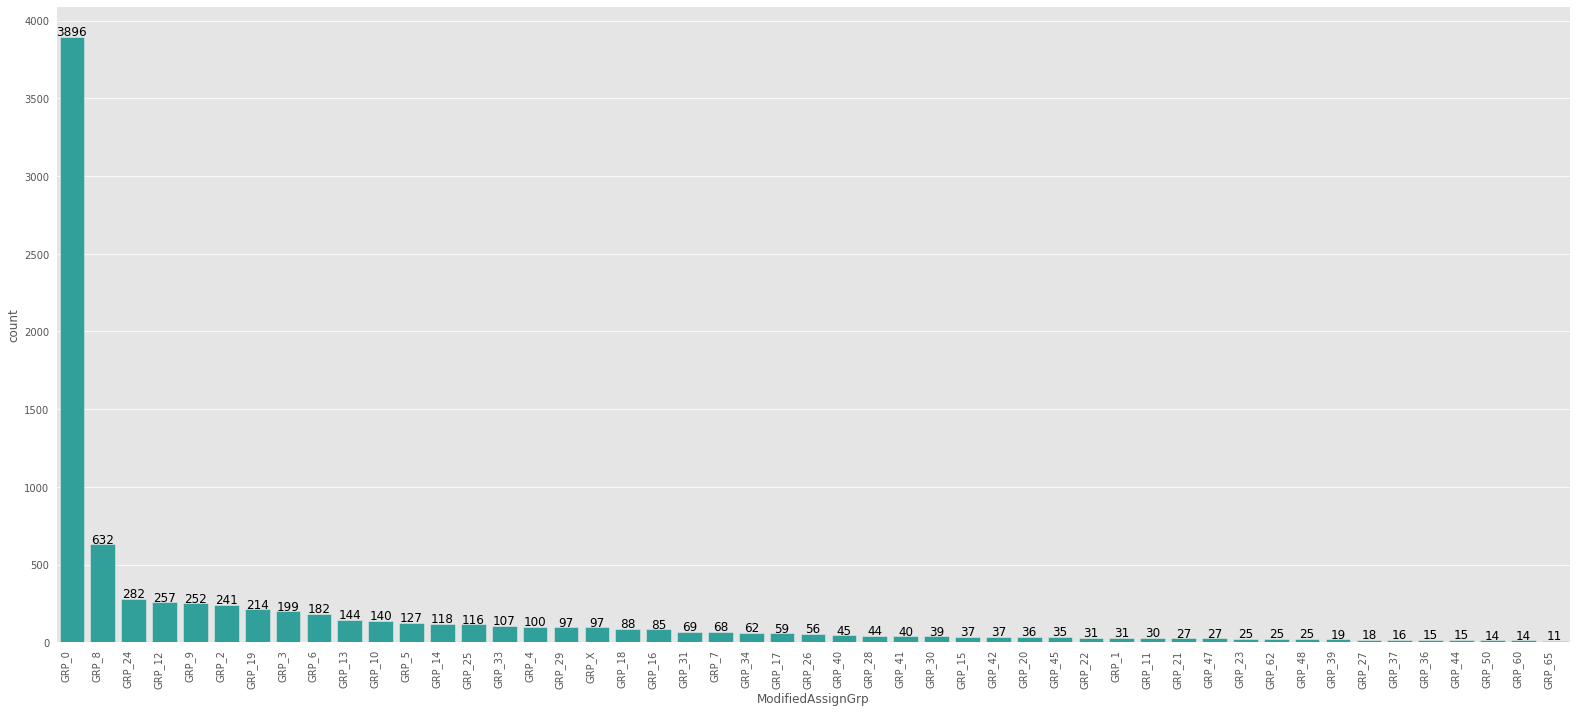

In [160]:
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = df["ModifiedAssignGrp"].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,10))
ax=sns.countplot(x='ModifiedAssignGrp', data=df, color='lightseagreen',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+170), ha='center', va='top', color='black', size=12)
plt.show()

In [161]:
def lemmatize_corpus(corpus, text_lemmatization=True, stopword_removal=True):
    
    lemmatize_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
            
        lemmatize_corpus.append(doc)
        
    return lemmatize_corpus

In [162]:
df['lmdescription'] = lemmatize_corpus(df['Trndescription'])

In [163]:
df.head(5)

,Description,Assignment group,Clndescription,Language,Trndescription,length,ModifiedAssignGrp,lmdescription
0,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,GRP_0,verified user details employee and manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login,en,verified user details employee and manager name checked the user name and reset the password advised the user login and check caller confirmed that was able login,177,GRP_0,verified user detail employee manager name checked user name reset password advised user login check caller confirmed able login
1,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",GRP_0,hello team my meetingsskype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,hello team meetingsskype meetings etc are not appearing outlook calendar can somebody please advise how correct this kind,133,GRP_0,hello team meetingsskype meeting etc appearing outlook calendar somebody please advise correct kind
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,GRP_0,hi cannot log on to vpn best,en,cannot log vpn best,28,GRP_0,log vpn best
3,unable to access hr_tool page,GRP_0,unable to access hr tool page,en,unable access tool page,29,GRP_0,unable access tool page
4,skype error,GRP_0,skype error,no,skype error,11,GRP_0,skype error


**Text Analysis**

In [164]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from wordcloud import WordCloud

In [165]:
combined_text=df.lmdescription.values.tolist()
combined_text[5]

'unable log engineering tool skype'

In [166]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(combined_text))

In [167]:
print(data_words[5])

['unable', 'log', 'engineering', 'tool', 'skype']


In [168]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [169]:
print(bigram_mod[data_words[5]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [170]:
print(trigram_mod[bigram_mod[data_words[5]]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [171]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [172]:
data_words_bigrams = make_bigrams(data_words)

In [173]:
print(data_words_bigrams[5])

['unable', 'log', 'engineering', 'tool', 'skype']


In [174]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

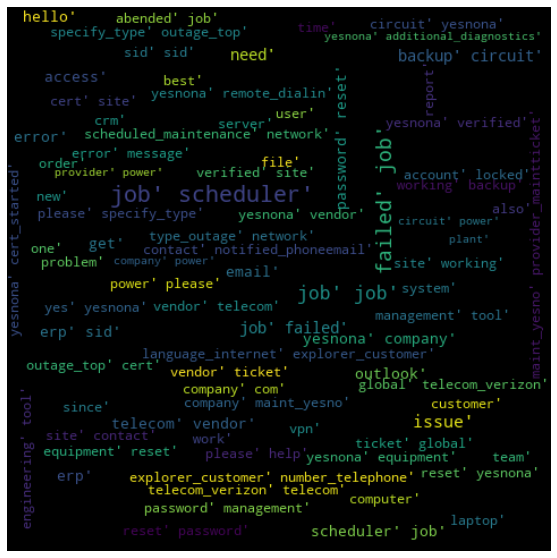

In [175]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

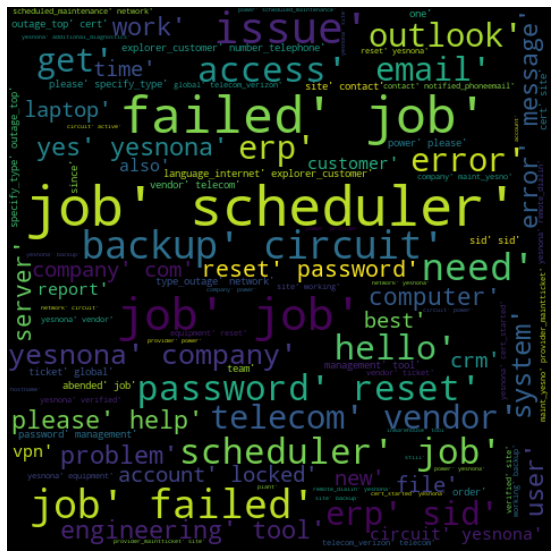

In [176]:
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [177]:
id2word = corpora.Dictionary(data_words_bigrams)
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

In [178]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 3), (13, 1)]]


In [179]:
lda_model = LdaModel(corpus=corpus,id2word=id2word,num_topics=7,random_state=200,update_every=1,chunksize=800,passes=10,alpha='auto',per_word_topics=True)

In [180]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.030*"please" + 0.020*"email" + 0.019*"hello" + 0.013*"outlook" + '
  '0.013*"crm" + 0.012*"device" + 0.011*"access" + 0.010*"team" + 0.009*"help" '
  '+ 0.009*"issue"'),
 (1,
  '0.030*"event" + 0.019*"ticket" + 0.018*"hostname" + 0.016*"device" + '
  '0.010*"name" + 0.010*"inside" + 0.010*"source" + 0.009*"deny_tcp" + '
  '0.009*"src_inside" + 0.009*"accessgroup_acl"'),
 (2,
  '0.072*"password" + 0.062*"user" + 0.040*"erp" + 0.039*"account" + '
  '0.036*"reset" + 0.035*"sid" + 0.028*"login" + 0.022*"please" + '
  '0.018*"window" + 0.018*"locked"'),
 (3,
  '0.255*"job" + 0.096*"scheduler" + 0.060*"failed" + 0.046*"abended" + '
  '0.022*"sid" + 0.011*"hostname" + 0.008*"hana" + 0.007*"cold" + 0.007*"tool" '
  '+ 0.006*"august"'),
 (4,
  '0.027*"error" + 0.026*"please" + 0.019*"tool" + 0.016*"message" + '
  '0.015*"issue" + 0.013*"access" + 0.012*"see" + 0.011*"company" + '
  '0.011*"order" + 0.010*"need"'),
 (5,
  '0.027*"unable" + 0.015*"printer" + 0.014*"problem" + 0.013*"con

In [181]:
texts=data_words_bigrams
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.1423512427343905

Coherence Score:  0.5424478846923593


In [182]:
# add a deep copy to another dataframe
data =  df.copy()
data['num_words'] = data.Description.apply(lambda x : len(x.split()))
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,8344.0,142.358221,312.622119,3.0,34.0,60.0,150.0,6383.0
num_words,8344.0,27.650168,65.565231,1.0,6.0,11.0,28.0,1625.0


In [183]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [184]:
word_distribution

,bins,counts
0,0-100,7941
1,100-300,361
2,300-500,18
3,500-800,10
4,>800,14


Text(0.5, 1.0, 'Word distribution per bin')

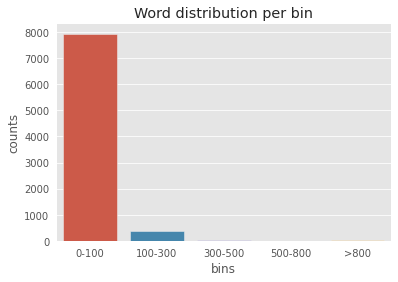

In [185]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
# split X and y into training and testing sets
trainX, testX, trainY, testY = train_test_split(df['lmdescription'], df['ModifiedAssignGrp'], random_state=100)

In [188]:
#Traing data
print(trainX.shape)
print(trainY.shape)

(6258,)
(6258,)


In [189]:
#Test Data
print(testX.shape)
print(testY.shape)

(2086,)
(2086,)


In [190]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_df=0.7,analyzer='word')

In [191]:
# transform the ticket description data to document term matrix
vectorizer.fit(trainX)
trainX_tf=vectorizer.transform(trainX)

In [192]:
#Convert Test ticket description also to tf-idf vectors
testX_tf = vectorizer.transform(testX)

In [193]:
trainX_tf.shape

(6258, 9111)

In [194]:
testX_tf.shape

(2086, 9111)

In [195]:
len(vectorizer.vocabulary_)

9111

In [196]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

**Support Vector Machine Classifier on Raw Data**

In [197]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10], } 

In [198]:
svc = SVC()
svc_gs = GridSearchCV(svc,param_grid,cv=5)
svc_gs.fit(trainX_tf, trainY)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [199]:
svc_gs.best_params_

{'C': 10, 'gamma': 0.1}

In [200]:
svc_tf = SVC(C=10, gamma=0.1)
svc_tf.fit(trainX_tf, trainY)
pred_testY_tf = svc_tf.predict(testX_tf)
#Calculate accuracy on Test Dataset
metrics.accuracy_score(testY, pred_testY_tf)

0.6462128475551294

**Random Forest Classifier on Raw Data**

In [201]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}

In [202]:
rfc=RandomForestClassifier()
rfc_gs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_gs.fit(trainX_tf, trainY)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [203]:
rfc_gs.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}

In [204]:
rfc_tf=RandomForestClassifier(max_features='sqrt', n_estimators= 200, criterion='gini')
rfc_tf.fit(trainX_tf, trainY)
predY_rf=rfc_tf.predict(testX_tf)
print("Accuracy:",metrics.accuracy_score(testY, predY_rf))

Accuracy: 0.6140939597315436


**Neural Network Model on Raw Data**

In [205]:
import tensorflow as tf
import numpy as np

In [206]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
trainY = le.fit_transform(trainY.values)
testY = le.transform(testY.values)

In [207]:
#Building a Keras Sequential Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [208]:
#Added hidden layers
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(len(vectorizer.vocabulary_),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

#Added Output layer
model.add(tf.keras.layers.Dense(n, activation='softmax'))

In [209]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [210]:
model.fit(trainX_tf, trainY, epochs=10, batch_size=32, validation_data=(testX_tf, testY))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


196/196 [==============================] - 4s 18ms/step - loss: 2.4649 - acc: 0.4933 - val_loss: 2.0172 - val_acc: 0.5292
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 1.8414 - acc: 0.5531 - val_loss: 1.8284 - val_acc: 0.5647
Epoch 3/10
196/196 [==============================] - 3s 16ms/step - loss: 1.5469 - acc: 0.6075 - val_loss: 1.6999 - val_acc: 0.5810
Epoch 4/10
196/196 [==============================] - 3s 16ms/step - loss: 1.3005 - acc: 0.6569 - val_loss: 1.6146 - val_acc: 0.6040
Epoch 5/10
196/196 [==============================] - 3s 16ms/step - loss: 1.0995 - acc: 0.7068 - val_loss: 1.5909 - val_acc: 0.6189
Epoch 6/10
196/196 [==============================] - 3s 16ms/step - loss: 0.9414 - acc: 0.7491 - val_loss: 1.5837 - val_acc: 0.6218
Epoch 7/10
196/196 [==============================] - 3s 17ms/step - loss: 0.7983 - acc: 0.7884 - val_loss: 1.6428 - val_acc: 0.6242
Epoch 8/10
196/196 [==============================] - 3s 17ms/step - loss: 0.699

In [211]:
score = model.evaluate(testX_tf, testY, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

66/66 [==============================] - 0s 2ms/step - loss: 1.7286 - acc: 0.6218
Test Score: 1.7285840511322021
Test Accuracy: 0.6217641234397888


**Data Augementation**

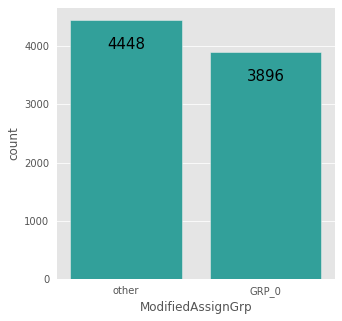

In [212]:
# Creating the Dataset for classifying GRP_0
dfGRP0 = df.copy(deep=True)
dfGRP0['ModifiedAssignGrp']=dfGRP0['ModifiedAssignGrp'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = dfGRP0['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=dfGRP0, color='lightseagreen',order=descending_order);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+10), ha='center', va='top', color='black', size=15)
plt.show()

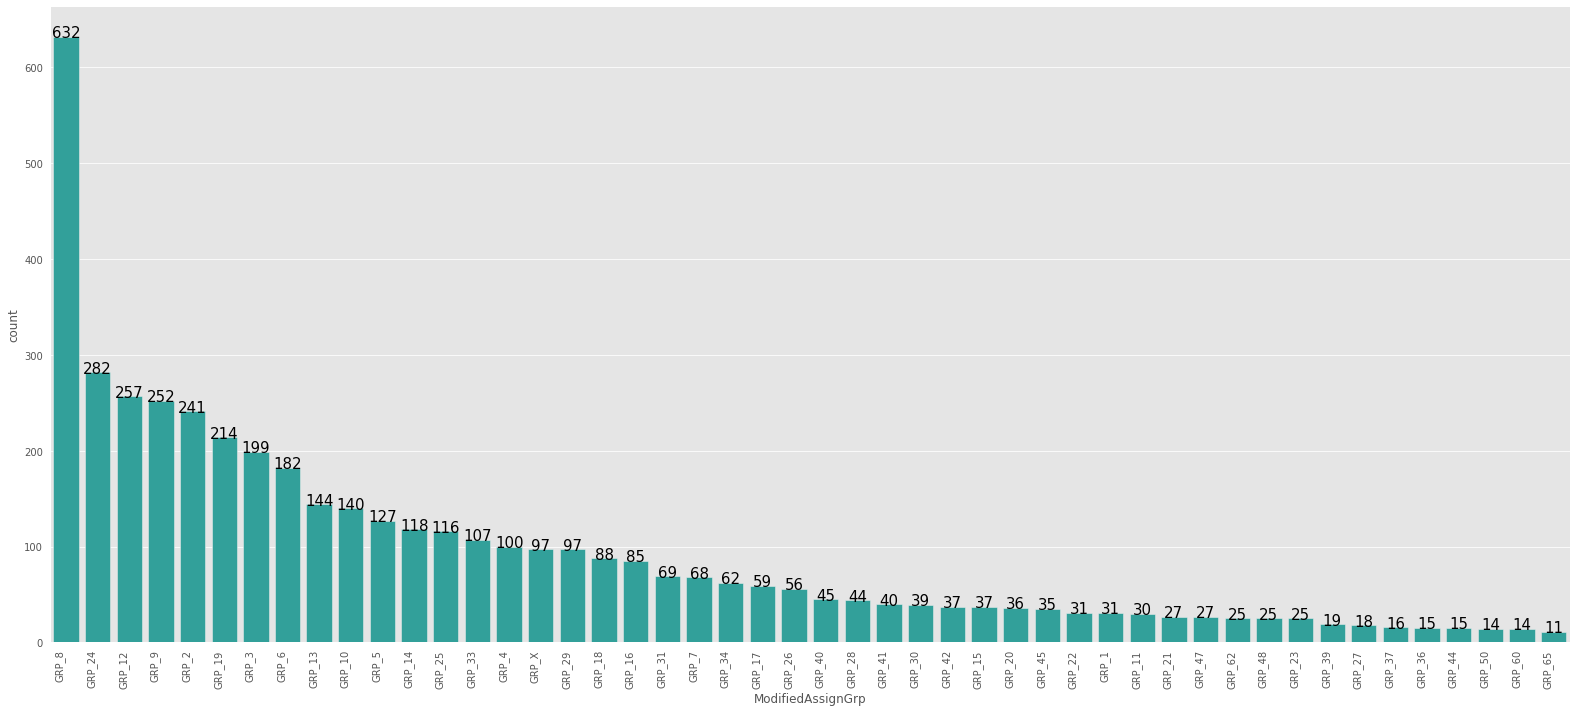

In [213]:
#Creating Dataset for 'others' i.e all groups which is not part of GRP_0
dfOthers = df[df['ModifiedAssignGrp'] != 'GRP_0']

descending_order = dfOthers['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,10))
ax=sns.countplot(x='ModifiedAssignGrp', data=dfOthers, color='lightseagreen',order=descending_order);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+30), ha='center', va='top', color='black', size=15)
plt.show()

In [214]:
maxOthers = dfOthers['ModifiedAssignGrp'].value_counts().max()
maxOthers

632

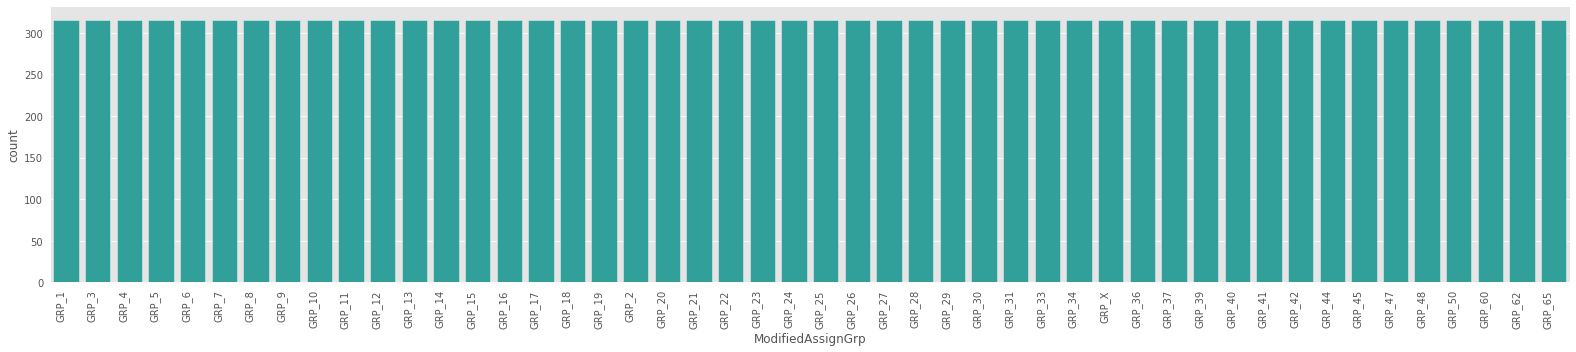

In [215]:
# Treating the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample

dfOthers_resampled = dfOthers[0:0]
for grp in dfOthers['ModifiedAssignGrp'].unique():
    dfGrp = dfOthers[dfOthers['ModifiedAssignGrp'] == grp]
    resampled = resample(dfGrp, replace=True, n_samples=int(maxOthers/2), random_state=123)
    dfOthers_resampled = dfOthers_resampled.append(resampled)

otherGrpsResampled = pd.concat([dfGRP0,dfOthers_resampled])
otherGrpsResampled.reset_index(inplace=True)

descending_order = dfOthers_resampled['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=dfOthers_resampled, color='lightseagreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

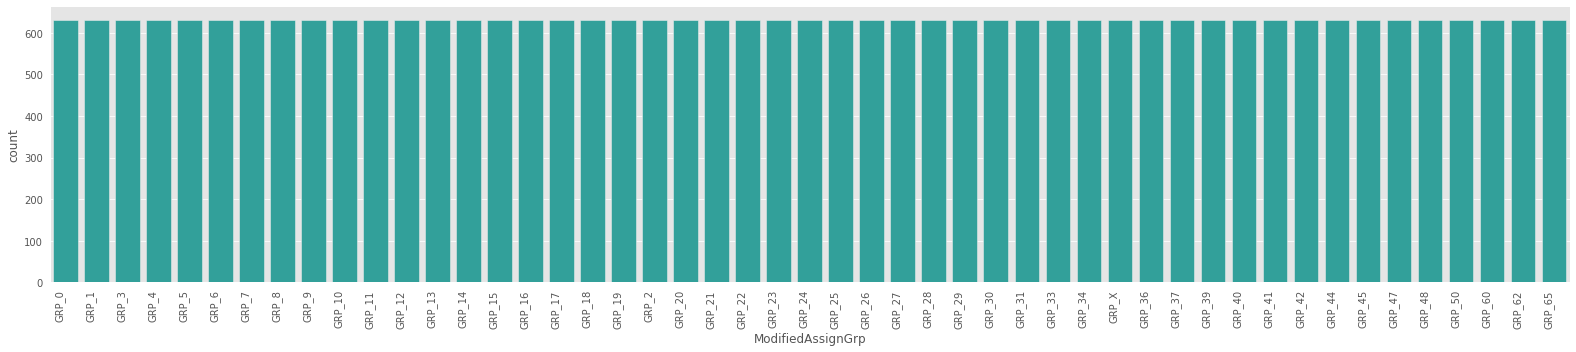

In [216]:
# Treat the imbalnce in the df dataset by resampling to 632.This is for us to try creating a single model which use the whole dataset & verify the performance
df_resampled = df[0:0]
for grp in df['ModifiedAssignGrp'].unique():
    dfGrp = df[df['ModifiedAssignGrp'] == grp]
    resampled = resample(dfGrp, replace=True, n_samples=int(maxOthers), random_state=123)
    df_resampled = df_resampled.append(resampled)

descending_order = df_resampled['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=df_resampled, color='lightseagreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

**Traditional ML Models**

In [217]:
# split X and y into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(df_resampled['lmdescription'], df_resampled['ModifiedAssignGrp'], random_state=100)

In [218]:
#Traing data
print(train_X.shape)
print(train_Y.shape)

(23226,)
(23226,)


In [219]:
#Test Data
print(test_X.shape)
print(test_Y.shape)

(7742,)
(7742,)


In [220]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer

vect=TfidfVectorizer(max_df=0.7,analyzer='word')

In [221]:
# transform the X data to document term matrix
vect.fit(train_X)
train_X_tf=vect.fit_transform(train_X)
test_X_tf = vect.transform(test_X)

In [222]:
train_X_tf.shape

(23226, 8662)

In [223]:
test_X_tf.shape

(7742, 8662)

In [224]:
len(vect.vocabulary_)

8662

In [225]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_Y = lb.fit_transform(train_Y.values)
test_Y = lb.transform(test_Y.values)

**Random Forest Classifier on Resampled Data**

In [226]:
#Setting Params for GridSearch
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}

In [227]:
#GridSearch for Hypertuning
rfc=RandomForestClassifier()
rfc_gs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_gs.fit(train_X_tf, train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [228]:
rfc_gs.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 200}

In [229]:
rfc_tf_resampled=RandomForestClassifier(max_features='log2', n_estimators= 200, criterion='gini')
rfc_tf_resampled.fit(train_X_tf, train_Y)
pred_Y_rf=rfc_tf_resampled.predict(test_X_tf)
print("Accuracy:",metrics.accuracy_score(test_Y, pred_Y_rf))

Accuracy: 0.9369671919400672


**Support Vector Machine Classifier on Resampled Data**

In [230]:
param_grid = {'C': [0.1,1,10, 100], 
              'gamma': [0.001,0.01,0.1, 1], } 

In [231]:
#GridSearch for Hypertuning
svc = SVC()
svc_gs = GridSearchCV(svc,param_grid,cv=3)
svc_gs.fit(train_X_tf, train_Y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [232]:
svc_gs.best_params_

{'C': 100, 'gamma': 1}

In [235]:
svc_tf_resampled = SVC(C=100, gamma=1)
svc_tf_resampled.fit(train_X_tf, train_Y)

SVC(C=100, gamma=1)

In [236]:
#Calculate accuracy on Test Dataset
pred_test_Y_tf = svc_tf_resampled.predict(test_X_tf)
metrics.accuracy_score(test_Y, pred_test_Y_tf)

0.9389046757943684